<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_1C2024_GRUPO02_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Lectura de archivo

### Desde google drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = "/content/drive/MyDrive/7506R-1C2024-GRUPO02"

train_file = drive_path + '/Dataset/ds_train.csv'
test_file = drive_path + '/Dataset/ds_test.csv'

ds_train = pd.read_csv(train_file)
ds_test = pd.read_csv(test_file)
using_drive = True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Desde maquina local

In [15]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# train_file = './dataset/ds_train.csv'
# test_file = './dataset/ds_test.csv'

# ds_train = pd.read_csv(train_file)
# ds_test = pd.read_csv(test_file)
# using_drive = False

# Agrupamiento
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio.

## Clustering
Analizar la tendencia al clustering del dataset.

In [16]:
ds_train.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,...,property_surface_covered,property_price,z_property_bedrooms,zm_property_bedrooms,place_encoded,type_encoded,score_property_surface,score_price_surface_total,score_location_price,property_location_surface_covered
0,Ab/aN6T8Mna0dAIe9hPIpA==,2021-04-10,2021-06-05,2021-04-10,-34.558977,-58.458816,Belgrano,Departamento,3.0,2.0,...,71.0,152000.0,0.111655,0.111655,7,7,-1.000000e+09,-1.160892,-0.981818,-1.000000
1,MzDpszQ1Zx3SGERGycYoSw==,2021-03-05,2021-03-09,2021-03-05,-34.551437,-58.454158,Nuñez,Departamento,2.0,1.0,...,38.0,116000.0,-0.896360,-0.896360,25,25,-1.000000e+00,-1.412184,-1.016862,-1.000000
2,Axqbmsbzc9JHXG5S0xW0fg==,2021-03-10,2021-05-06,2021-03-10,-34.638146,-58.509707,Villa Luro,Departamento,3.0,2.0,...,54.0,82000.0,0.111655,0.111655,50,50,-1.000000e+00,-1.335574,-1.001649,-1.000000
3,ds5G1c/HVhlxBxwWAGvn3Q==,2021-03-29,2021-04-15,2021-03-29,-34.585703,-58.418339,Palermo,Departamento,4.0,3.0,...,100.0,260000.0,1.119670,1.119670,27,27,-1.000000e+00,-1.028576,-1.000000,-1.000000
4,DuRHdE5YZY2gPv3gNbtB3Q==,2021-10-23,2021-11-03,2021-10-23,-34.568861,-58.505879,Villa Urquiza,PH,5.0,4.0,...,137.0,235000.0,2.127685,2.127685,57,57,-1.085423e+00,-1.630562,-1.000000,-1.057145


Para agrupar, podemos dejar de lado la columna 'place_l3', ya que podemos completar los datos necesarios para realizar el clustering utilizando las columnas de latitud y longitud. Además, podemos eliminar la columna 'id', ya que generalmente solo sirve como un identificador único para cada fila y no es una característica relevante para el clustering. Similarmente, podemos descartar cualquier información relacionada con fechas, ya que no es necesaria para nuestro análisis de clustering.

In [17]:
ds_cluster_train = ds_train.copy()
ds_cluster_test = ds_test.copy()

columnas_a_eliminar = ['place_l3','id','start_date','end_date','created_on']
ds_cluster_train.drop(columns = columnas_a_eliminar,inplace=True)
ds_cluster_test.drop(columns = columnas_a_eliminar,inplace=True)

In [18]:
ds_cluster_train.head()

,latitud,longitud,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_bedrooms,zm_property_bedrooms,place_encoded,type_encoded,score_property_surface,score_price_surface_total,score_location_price,property_location_surface_covered
0,-34.558977,-58.458816,Departamento,3.0,2.0,78.0,71.0,152000.0,0.111655,0.111655,7,7,-1.000000e+09,-1.160892,-0.981818,-1.000000
1,-34.551437,-58.454158,Departamento,2.0,1.0,38.0,38.0,116000.0,-0.896360,-0.896360,25,25,-1.000000e+00,-1.412184,-1.016862,-1.000000
2,-34.638146,-58.509707,Departamento,3.0,2.0,54.0,54.0,82000.0,0.111655,0.111655,50,50,-1.000000e+00,-1.335574,-1.001649,-1.000000
3,-34.585703,-58.418339,Departamento,4.0,3.0,138.0,100.0,260000.0,1.119670,1.119670,27,27,-1.000000e+00,-1.028576,-1.000000,-1.000000
4,-34.568861,-58.505879,PH,5.0,4.0,273.0,137.0,235000.0,2.127685,2.127685,57,57,-1.085423e+00,-1.630562,-1.000000,-1.057145


<ipython-input-19-0ae634a64398>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ds_cluster_train, x='longitud', y='property_type', inner='box', palette=palette)
<ipython-input-19-0ae634a64398>:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.violinplot(ds_cluster_train, x='longitud', y='property_type', inner='box', palette=palette)


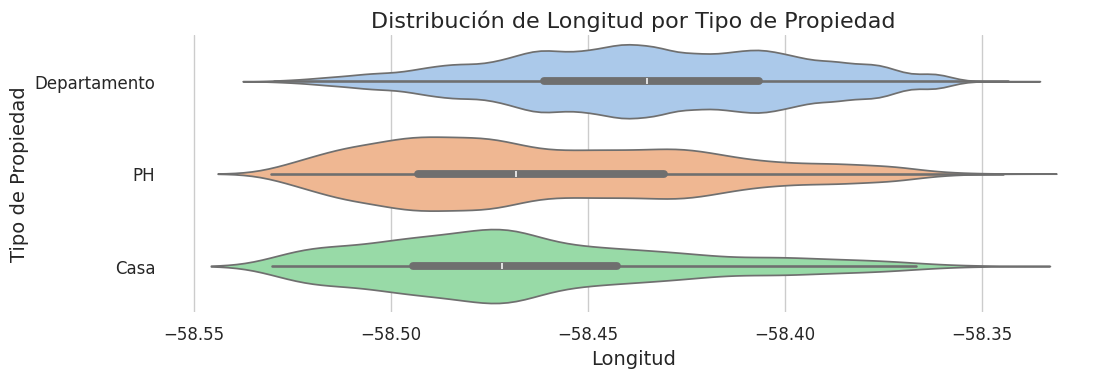

In [19]:
# @title property_type vs longitud
# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Ajuste del tamaño de la figura
figsize = (12, 1.2 * len(ds_cluster_train['property_type'].unique()))
plt.figure(figsize=figsize)

# Creación del gráfico de violín
sns.violinplot(ds_cluster_train, x='longitud', y='property_type', inner='box', palette=palette)

# Eliminación de los ejes
sns.despine(top=True, right=True, bottom=True, left=True)

# Ajustes de título y etiquetas
plt.title("Distribución de Longitud por Tipo de Propiedad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Tipo de Propiedad", fontsize=14)

# Ajuste del tamaño de fuente de las etiquetas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

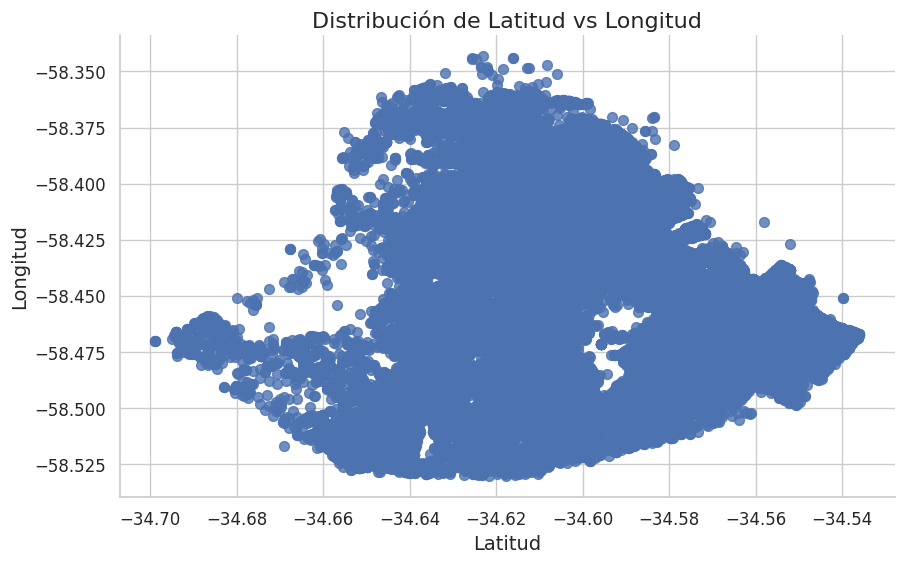

In [20]:
# @title latitud vs longitud

# Configuración de la figura y los ejes
plt.figure(figsize=(10, 6))

# Creación del gráfico de dispersión
plt.scatter(ds_cluster_train['latitud'], ds_cluster_train['longitud'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Distribución de Latitud vs Longitud", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Longitud", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [21]:
ds_cluster_test.head()

,latitud,longitud,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.639975,-58.438678,Departamento,2.0,1.0,48.0,42.0,95000.0
1,-34.603768,-58.433634,Departamento,3.0,2.0,73.0,73.0,137000.0
2,-34.625908,-58.417775,Departamento,4.0,3.0,79.0,71.0,138900.0
3,-34.612766,-58.496000,Departamento,2.0,1.0,42.0,42.0,92900.0
4,-34.615833,-58.371799,Departamento,4.0,3.0,97.0,72.0,129900.0


Vamos a realizar una transformación de variables para trabajar con todos datos numéricos. En este caso, vamos a utilizar la regresión logística para la variable proterty_type

In [22]:
ds_cluster_train = pd.get_dummies(ds_cluster_train, columns=["property_type"])
ds_cluster_train.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,z_property_bedrooms,zm_property_bedrooms,place_encoded,type_encoded,score_property_surface,score_price_surface_total,score_location_price,property_location_surface_covered,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.558977,-58.458816,3.0,2.0,78.0,71.0,152000.0,0.111655,0.111655,7,7,-1.000000e+09,-1.160892,-0.981818,-1.000000,False,True,False
1,-34.551437,-58.454158,2.0,1.0,38.0,38.0,116000.0,-0.896360,-0.896360,25,25,-1.000000e+00,-1.412184,-1.016862,-1.000000,False,True,False
2,-34.638146,-58.509707,3.0,2.0,54.0,54.0,82000.0,0.111655,0.111655,50,50,-1.000000e+00,-1.335574,-1.001649,-1.000000,False,True,False
3,-34.585703,-58.418339,4.0,3.0,138.0,100.0,260000.0,1.119670,1.119670,27,27,-1.000000e+00,-1.028576,-1.000000,-1.000000,False,True,False
4,-34.568861,-58.505879,5.0,4.0,273.0,137.0,235000.0,2.127685,2.127685,57,57,-1.085423e+00,-1.630562,-1.000000,-1.057145,False,False,True


In [23]:
ds_cluster_test = pd.get_dummies(ds_cluster_test, columns=["property_type"])
ds_cluster_test.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.639975,-58.438678,2.0,1.0,48.0,42.0,95000.0,False,True,False
1,-34.603768,-58.433634,3.0,2.0,73.0,73.0,137000.0,False,True,False
2,-34.625908,-58.417775,4.0,3.0,79.0,71.0,138900.0,False,True,False
3,-34.612766,-58.496000,2.0,1.0,42.0,42.0,92900.0,False,True,False
4,-34.615833,-58.371799,4.0,3.0,97.0,72.0,129900.0,False,True,False


Aplico máximos y minimos para el dataset

In [ ]:
def aplicar_max_min(ds, columnas):
    scaler = MinMaxScaler()
    for columna in columnas:
        ds[[columna]] = scaler.fit_transform(ds[[columna]])

columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']

aplicar_max_min(ds_cluster_train,columnas_con_numeros)

## Grupos
Estimar la cantidad apropiada de grupos que se deben formar.

Para ello vamos a utilizar la Regla del codo (Elbow Method).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

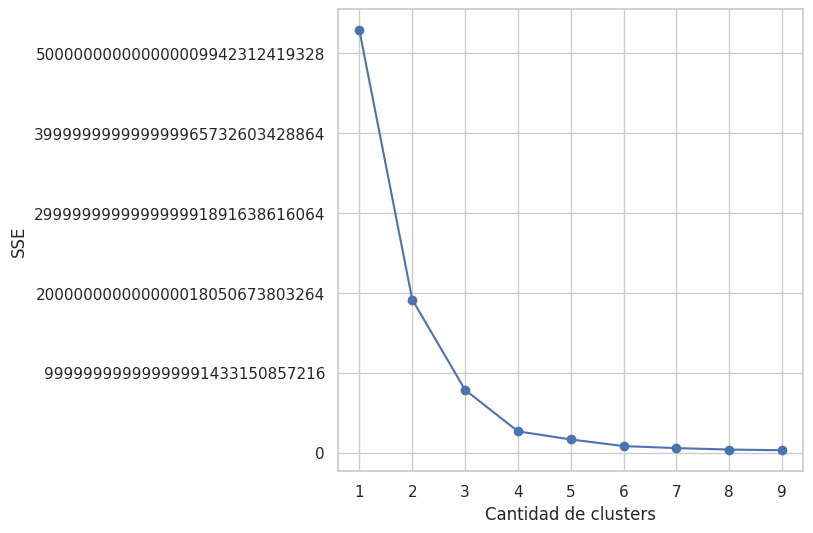

In [25]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_cluster_train)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')

# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Al ver el gráfico no tenemos un codo pronunciadamente. Entonces verificamos la cantidad de conjuntos a elegir con el método de Silhouette.

## Grupos con Silhouette <font color='red'> REVISAR </font>
Evaluar la calidad de los grupos formados realizando un análisis de Silhouette

In [26]:
list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_cluster_train)

    score = silhouette_score (ds_cluster_train, preds)
    print ("\n\nFor n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




For n_clusters =2 silhouette score is 0.9994413130556185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




For n_clusters =3 silhouette score is 0.9991925603996996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




For n_clusters =4 silhouette score is 0.9983805552618359


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




For n_clusters =5 silhouette score is 0.9979571327586109


## Análisis de grupo
Realizar un análisis de cada grupo intentando entender en función de qué características
fueron formados.

## Mapa de CABA
Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que pertenecen.

In [27]:
# Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
latitud = -34.6037
longitud = -58.3816

# Crear el mapa centrado en Buenos Aires
mapa = folium.Map(location=[latitud, longitud], zoom_start=12)

ds_latitud_longitud = ds_cluster_train[['latitud','longitud']]
ds_latitud_longitud.shape

(72261, 2)

In [28]:
# OJO QUE ACÁ ESTOY DISMINUYENDO LA CANTIDAD DE PROPIEDADES

ds_latitud_longitud = ds_latitud_longitud.sample(n=1000)

# Iterar sobre las filas del DataFrame ds_latitud_longitud
for index, row in ds_latitud_longitud.iterrows():
    # Obtener las coordenadas de cada punto
    punto_latitud = row['latitud']
    punto_longitud = row['longitud']

    # Añadir un marcador para cada punto
    folium.Marker(location=[punto_latitud, punto_longitud]).add_to(mapa)

# Mostrar el mapa
mapa

In [29]:
mapa_cluster = folium.Map(location=[latitud, longitud], zoom_start=12)

marcador = MarkerCluster()

for index, row in ds_latitud_longitud.iterrows():
    # Obtener las coordenadas de cada punto
    punto_latitud = row['latitud']
    punto_longitud = row['longitud']

    # Añadir un marcador para cada punto
    marcador.add_child(folium.Marker(location=[punto_latitud, punto_longitud]))

mapa_cluster.add_child(marcador)


## Análisis con tres grupos
Repetir el análisis anterior, utilizando sólo 3 grupos.